In [380]:
import time
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from tensorflow.keras import regularizers
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
import sklearn.metrics as m
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor

mpl.rcParams['figure.dpi']= 150

In [381]:
d = 1000 # assign depth

In [382]:
data = pd.read_csv('AASG_Thermed_AllTempsThicksConds.csv', low_memory=False)

In [383]:
def remove_outliers_iqr(data, column):
    # Calculation the first and third quartiles
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    
    # Calculation the IQR (Interquartile Range)
    IQR = Q3 - Q1
    
    # Defining the lower and upper bounds to identify outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Creating masks for outliers and non-outliers
    outliers_mask = (data[column] < lower_bound) | (data[column] > upper_bound)
    # Create a mask for non-outliers
    non_outliers_mask = (data[column] >= lower_bound) & (data[column] <= upper_bound)
    
    return data[non_outliers_mask].copy(), outliers_mask

# Plotting the original column values

data_iqr_removed = remove_outliers_iqr(data, 'HeatFlow')[0]
outliers_mask = remove_outliers_iqr(data, 'HeatFlow')[1]

data_iqr_removed = data_iqr_removed.reset_index(drop=True)

In [384]:
# Defining features and target
features = ['LatDegree', 'LongDegree', 'MeasureDepth_m', 'SurfTemp']
geological_layers = data_iqr_removed.iloc[:, 52:101].values
geological_conds = data_iqr_removed.iloc[:, 101:150].values
mult = np.multiply(geological_layers, geological_conds)
np.nan_to_num(mult, 0)
X = np.concatenate((data_iqr_removed[features].values, mult), axis=1)
y = data_iqr_removed['CorrBHT'].values

In [385]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import lightgbm as lgb

In [386]:
# Assuming X, y are your features and target variable
X_train, y_train = X, y

In [387]:
model = lgb.LGBMRegressor(learning_rate=0.1, num_leaves=30, n_estimators=200, max_depth=15, min_child_samples=5)
model.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007126 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13062
[LightGBM] [Info] Number of data points in the train set: 19593, number of used features: 53
[LightGBM] [Info] Start training from score 37.071158


LGBMRegressor(max_depth=15, min_child_samples=5, n_estimators=200,
              num_leaves=30)

# Maps - 1000

In [388]:
data_map = pd.read_csv('AASG_Thermed_AllTempsThicksConds.csv', low_memory=False)

In [389]:
def remove_outliers_iqr(data, column):
    # Calculation the first and third quartiles
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    
    # Calculation the IQR (Interquartile Range)
    IQR = Q3 - Q1
    
    # Defining the lower and upper bounds to identify outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Creating masks for outliers and non-outliers
    outliers_mask = (data[column] < lower_bound) | (data[column] > upper_bound)
    # Create a mask for non-outliers
    non_outliers_mask = (data[column] >= lower_bound) & (data[column] <= upper_bound)
    
    return data[non_outliers_mask].copy(), outliers_mask

# Plotting the original column values

data_map_iqr_removed = remove_outliers_iqr(data_map, 'HeatFlow')[0]

data_map_iqr_removed = data_map_iqr_removed.reset_index(drop=True)

In [390]:
data_map_iqr_removed['MeasureDepth_m'] = 1000

In [391]:
features = ['LatDegree', 'LongDegree', 'MeasureDepth_m', 'SurfTemp']
geological_layers = data_map_iqr_removed.iloc[:, 52:101].values
geological_conds = data_map_iqr_removed.iloc[:, 101:150].values
mult = np.multiply(geological_layers, geological_conds)
np.nan_to_num(mult, 0)
X = np.concatenate((data_map_iqr_removed[features].values, mult), axis=1)
y = data_map_iqr_removed['CorrBHT'].values

In [392]:
prediction = model.predict(X)

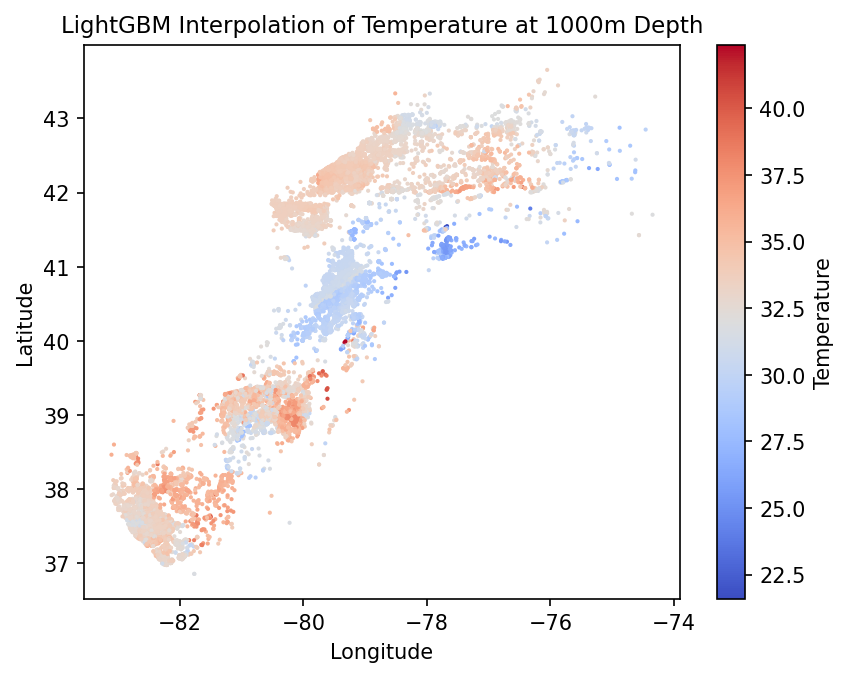

In [393]:
#Visalization
from scipy.interpolate import griddata


plt.scatter(data_map_iqr_removed['LongDegree'],data_map_iqr_removed['LatDegree'], 
            c=prediction, cmap='coolwarm',s=1)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('LightGBM Interpolation of Temperature at '+ str(d) + 'm Depth', fontsize=11)
#plt.clim(290-273,380-273)
#plt.colorbar().set_clim(290,380)
plt.colorbar().set_label('Temperature')
plt.show()

# D-2000

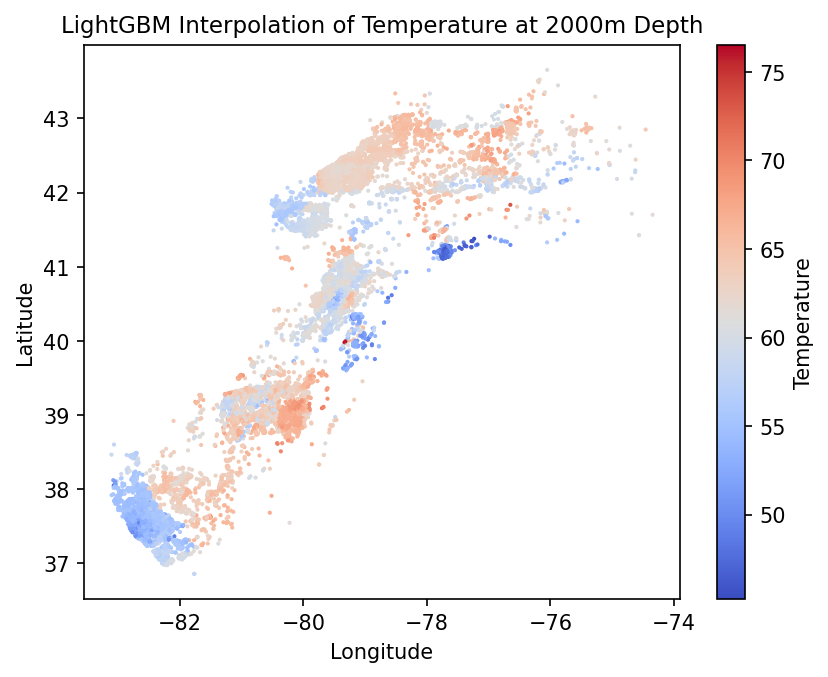

In [394]:
data_map = pd.read_csv('AASG_Thermed_AllTempsThicksConds.csv', low_memory=False)

def remove_outliers_iqr(data, column):
    # Calculation the first and third quartiles
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    
    # Calculation the IQR (Interquartile Range)
    IQR = Q3 - Q1
    
    # Defining the lower and upper bounds to identify outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Creating masks for outliers and non-outliers
    outliers_mask = (data[column] < lower_bound) | (data[column] > upper_bound)
    # Create a mask for non-outliers
    non_outliers_mask = (data[column] >= lower_bound) & (data[column] <= upper_bound)
    
    return data[non_outliers_mask].copy(), outliers_mask

# Plotting the original column values

data_map_iqr_removed = remove_outliers_iqr(data_map, 'HeatFlow')[0]

data_map_iqr_removed = data_map_iqr_removed.reset_index(drop=True)

data_map_iqr_removed['MeasureDepth_m'] = 2000

features = ['LatDegree', 'LongDegree', 'MeasureDepth_m', 'SurfTemp']
geological_layers = data_map_iqr_removed.iloc[:, 52:101].values
geological_conds = data_map_iqr_removed.iloc[:, 101:150].values
mult = np.multiply(geological_layers, geological_conds)
np.nan_to_num(mult, 0)
X = np.concatenate((data_map_iqr_removed[features].values, mult), axis=1)
y = data_map_iqr_removed['CorrBHT'].values

prediction = model.predict(X)

plt.scatter(data_map_iqr_removed['LongDegree'],data_map_iqr_removed['LatDegree'], 
            c=prediction, cmap='coolwarm',s=1)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('LightGBM Interpolation of Temperature at '+ '2000' + 'm Depth', fontsize=11)
#plt.clim(290-273,380-273)
#plt.colorbar().set_clim(290,380)
plt.colorbar().set_label('Temperature')
plt.show()

# D-3000

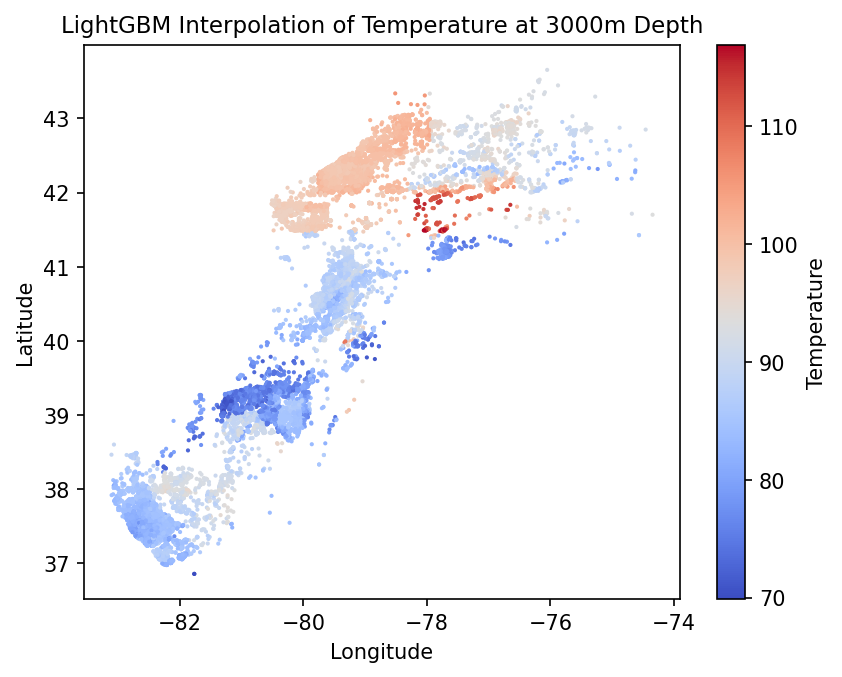

In [395]:
data_map = pd.read_csv('AASG_Thermed_AllTempsThicksConds.csv', low_memory=False)

def remove_outliers_iqr(data, column):
    # Calculation the first and third quartiles
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    
    # Calculation the IQR (Interquartile Range)
    IQR = Q3 - Q1
    
    # Defining the lower and upper bounds to identify outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Creating masks for outliers and non-outliers
    outliers_mask = (data[column] < lower_bound) | (data[column] > upper_bound)
    # Create a mask for non-outliers
    non_outliers_mask = (data[column] >= lower_bound) & (data[column] <= upper_bound)
    
    return data[non_outliers_mask].copy(), outliers_mask

# Plotting the original column values

data_map_iqr_removed = remove_outliers_iqr(data_map, 'HeatFlow')[0]

data_map_iqr_removed = data_map_iqr_removed.reset_index(drop=True)

data_map_iqr_removed['MeasureDepth_m'] = 3000

features = ['LatDegree', 'LongDegree', 'MeasureDepth_m', 'SurfTemp']
geological_layers = data_map_iqr_removed.iloc[:, 52:101].values
geological_conds = data_map_iqr_removed.iloc[:, 101:150].values
mult = np.multiply(geological_layers, geological_conds)
np.nan_to_num(mult, 0)
X = np.concatenate((data_map_iqr_removed[features].values, mult), axis=1)
y = data_map_iqr_removed['CorrBHT'].values

prediction = model.predict(X)

plt.scatter(data_map_iqr_removed['LongDegree'],data_map_iqr_removed['LatDegree'], 
            c=prediction, cmap='coolwarm',s=1)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('LightGBM Interpolation of Temperature at '+ '3000' + 'm Depth', fontsize=11)
#plt.clim(290-273,380-273)
#plt.colorbar().set_clim(290,380)
plt.colorbar().set_label('Temperature')
plt.show()